# Project: TMDb Movie Dataset Investigation   

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

__Dataset:__ [TMDb movie data](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000)

__Datasource:__ cleaned from original data on [Kaggle](https://www.google.com/url?q=https://www.kaggle.com/tmdb/tmdb-movie-metadata&sa=D&ust=1532469042115000)


### Overview 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It provides data on the plot, cast, crew, budget etc. 

This data set was generated from [The Movie Database API](https://www.themoviedb.org/documentation/api). 
The Movie Database (TMDb) is a community built movie and TV database. 

### Notes
* Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
* There are some odd characters in the ‘cast’ column (not to be cleaned). 
* The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Questions 
Some questiones planned to be explored: 
 * Which genres are most popular from year to year? 
 * What makes a film popular?
 * What kinds of properties are associated with movies that have high revenues?

### Imports

In [4]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import heapq
import matplotlib.cm as cm
from wordcloud import WordCloud 
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling 

### Load the dataset

In [408]:
df0 = pd.read_csv('tmdb-movies.csv')
df0.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### General Properties 
In this section will be performed a general overview of the dataset, structure of the data, datatypes are going to be inspected. It is going to be checked for cleanliness and problems that need to be addressed (instances of missing or possibly errant data).

#### Data structure and data types

In [106]:
# Dimensionality of the DataFrame
df0.shape

(10866, 21)

The dataset contains data about 10866 films in 21 columns.

In [107]:
# General info - datatypes and missing values
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

There are 3 Datatypes: float64(4), int64(6), object(11). 
There are missing values in several columns that need further investigation. No data is missing by the numerical features. 

__Features overview__

* id - Film ID (int)
* imdb_id -  Corresponding IMDB ID (string)
* popularity - a metric built on a number of different values (float) i.e. Daily number of: votes,views, users who marked it as a "favourite", users who added it to their "watchlist"; Release date, Number of total votes, Previous days score.  It can be anywhere from 0 to essentially infinity. [TMDb API Docs](https://www.themoviedb.org/documentation/api)
* budget - Budget in USD (int)
* revenue - Revenue in USD (int)
* original_title -Original film title (string)
* cast - Cast members divided by '|' (string)
* homepage - Film Homepage URL (string)
* director - Name of the director (string)
* tagline -  Tagline of the film (string)
* keywords - keywords divided by '|' (string)
* overview - Film Overview Text (string)
* runtime - runtime in minutes (int)
* genres - genres divided by '|' (string)
* production_companies - list of production companies divided by '|' (string)
* release_date - release date in format m/d/yy (string)
* release_year - year of release in format yyyy (int)
* vote_count - count of votes (int)
* vote_average - average of all of the TMDb user ratings ([Ratings](https://developers.themoviedb.org/3/movies/rate-movie) have a value between 0.5 and 10.0) (float)
* budget_adj -  budget in 2010 dollars, accounting for inflation over time (float)
* revenue_adj - revenue in 2010 dollars, accounting for inflation over time (float)


Reference: https://developers.themoviedb.org/3/movies/get-movie-details


#### Number of non-null unique values for features 

In [108]:
df0.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Features do not seem to fall into categories, there are many unique values across all features.

In [109]:
#Summary descriptive statistics
df0.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning 
In this section the dataset is going to be trimmed and cleaned for analysis. 

 #### Drop duplicates 

In [110]:
#Duplicate rows
sum(df0.duplicated())

1

In [111]:
df0[df0.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [112]:
df0[df0.id==42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


It seems there is one duplicate entry that has to be dropped. 

In [113]:
df0.drop_duplicates(inplace=True)
sum(df0.duplicated())

0

In [114]:
df0.shape

(10865, 21)

#### Missing values

In [115]:
df0.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The missing values for features that are going to be used for the analysis need to be addressed. They should further investigated and filled in or dropped. 

#### Drop Extraneous Columns

In [116]:
# drop Extraneous columns; columns with many missing values
df0.drop(['imdb_id','homepage', 'tagline'], axis=1, inplace=True)

#### Drop Rows with Missing Values

In [404]:
df0.genres.dropna(axis=0,inplace=True)

In [405]:
df0.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Fill 0$ with mean value

There are a large number of films with 0$ for budget or revenue. Since these are important for the analysis, my decision was to fill in the missing values with the means. 

In [410]:
#df0.revenue.loc[df0.revenue ==0].sum()

In [127]:
df0.revenue.loc[df0.revenue ==0]=df0.revenue.mean()
df0.revenue_adj.loc[df0.revenue_adj ==0]=df0.revenue_adj.mean()
df0.budget.loc[df0.budget ==0]=df0.budget.mean()
df0.budget_adj.loc[df0.budget_adj ==0]=df0.budget_adj.mean()

In [130]:
df0.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,2.229110e+07,6.187923e+07,102.071790,217.399632,5.975012,2001.321859,2.675046e+07,7.981225e+07
std,92134.091971,1.000231,2.801385e+07,1.110236e+08,31.382701,575.644627,0.935138,12.813260,3.051007e+07,1.365647e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.000000,0.207575,1.462429e+07,3.982690e+07,90.000000,17.000000,5.400000,1995.000000,1.754989e+07,5.136900e+07
50%,20662.000000,0.383831,1.462429e+07,3.982690e+07,99.000000,38.000000,6.000000,2006.000000,1.754989e+07,5.136900e+07
75%,75612.000000,0.713857,1.500000e+07,3.982690e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,5.136900e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df0.to_csv('tmdb_clean.csv')
df = pd.read_csv('tmdb_clean.csv')

<a id='eda'></a>
## Exploratory Data Analysis

Compute statistics and create visualizations with the goal of addressing the research questions.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10865 entries, 0 to 10864
Data columns (total 19 columns):
Unnamed: 0              10865 non-null int64
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null float64
revenue                 10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(6)

### Popularity 


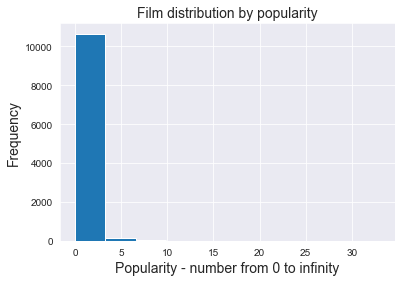

In [9]:
df.popularity.hist();
plt.xlabel('Popularity - number from 0 to infinity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Film distribution by popularity',fontsize=14);

In order to better see the distribution , use a log scale

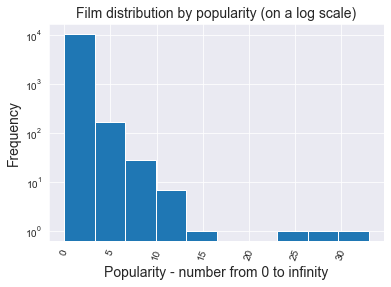

In [10]:
# Plot on a log scale
df['popularity'].plot(kind='hist', rot=70, logy=True);
plt.xlabel('Popularity - number from 0 to infinity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Film distribution by popularity (on a log scale)',fontsize=14);

The majority of the films have popularity under 10, the histogramm is skewed to the right. Only a few outliers have very large popularity. Let's find out the TOP 10 most popular films.    

### TOP 10 most popular films

In [8]:
best_pop = heapq.nlargest(10, df.popularity )

In [9]:
df.loc[df['popularity']>= best_pop[9],['original_title','popularity','budget','revenue']].sort_values('popularity')

,original_title,popularity,budget,revenue
633,The Hunger Games: Mockingjay - Part 1,10.739009,125000000,752100229
3,Star Wars: The Force Awakens,11.173104,200000000,2068178225
632,John Wick,11.422751,20000000,78739897
1329,Star Wars,12.037933,11000000,775398007
631,Captain America: The Winter Soldier,12.971027,170000000,714766572
2,Insurgent,13.112507,110000000,295238201
630,Guardians of the Galaxy,14.311205,170000000,773312399
629,Interstellar,24.949134,165000000,621752480
1,Mad Max: Fury Road,28.419936,150000000,378436354
0,Jurassic World,32.985763,150000000,1513528810


### Release Year

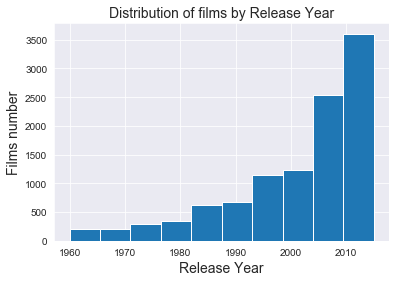

In [12]:
df.release_year.hist();
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Films number', fontsize=14)
plt.title('Distribution of films by Release Year',fontsize=14);

Histogramm ist sewed to the left - there are more new films than older ones in the dataset. After 2000 were produced much more films.  

#### Question: Are films from recent years more popular than older films?

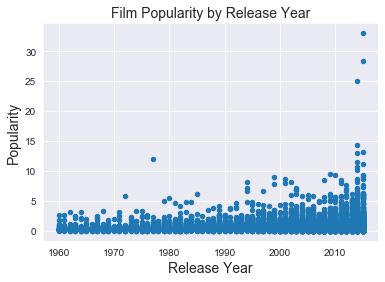

In [13]:
df.plot(x='release_year', y='popularity', kind='scatter');
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.title('Film Popularity by Release Year',fontsize=14);


It seems like there is no strong relationship between Release year and popularity. 

#### Budget

Fot the analysis is used _budget_adj_ (budget in 2010 dollars, accounting for inflation over time). 

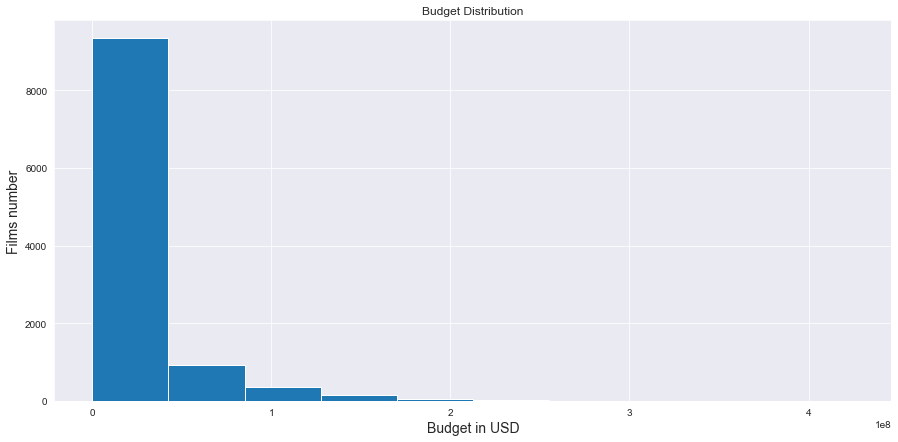

In [299]:
df.budget_adj.hist(figsize=(15,7))
plt.xlabel('Budget in USD', fontsize=14)
plt.ylabel('Films number', fontsize=14)
plt.title('Budget Distribution');

In [137]:
heapq.nlargest(10, df.budget_adj)

[425000000.0,
 368371256.18475896,
 315500574.789463,
 292050672.73872405,
 271692064.214419,
 271330494.318938,
 260000000.0,
 257599886.656049,
 254100108.531238,
 250419201.74371895]

Text(0.5, 1.0, 'Box plot - adjusted budget(USD)')

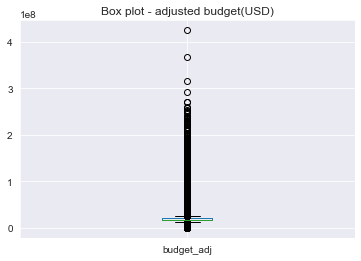

In [15]:
df.budget_adj.plot(kind='box');
plt.title('Box plot - adjusted budget(USD)')

In [154]:
df.budget_adj.mean()/1000000

26.75046434901661

The mean film budget is about 27 million but there are quite a few outliers, as the boxplot clearly shows. 

Text(0.5, 1.0, 'Budget by year')

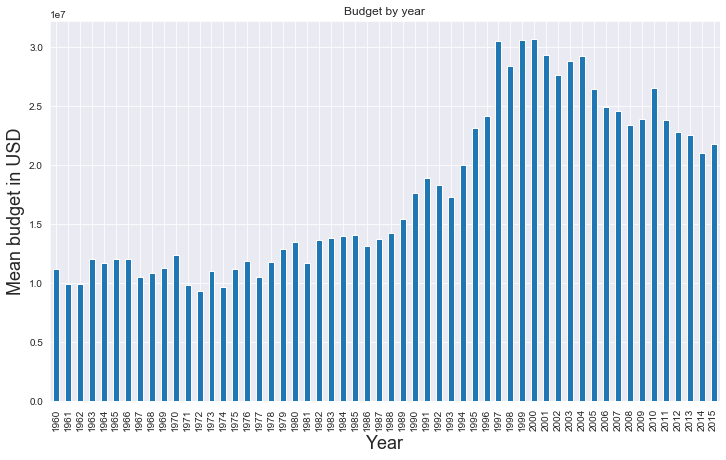

In [301]:
budget_by_year=df.groupby('release_year').mean()['budget']
budget_by_year.plot(kind='bar', figsize=(12,7))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Mean budget in USD', fontsize=18)
plt.title('Budget by year')

At first, it seems like in recent years much bigger budgets were spent. 
However, if the budget_adj column is taken again, differences are observed.  

Text(0.5, 1.0, 'Adjusted Budget by year')

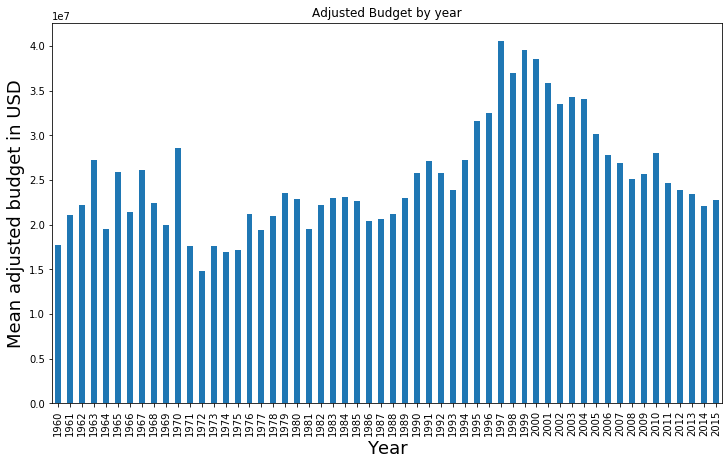

In [156]:
budget_by_year=df.groupby('release_year').mean()['budget_adj']
budget_by_year.plot(kind='bar', figsize=(12,7))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Mean adjusted budget in USD', fontsize=18)
plt.title('Adjusted Budget by year')

When the inflation is taken into account, the graphic shows that actually in recent years the film budgets have shrunk, after a peak in the end of the 90s.    

#### Does a bigger budget make a film more successfull i.e. more popular?

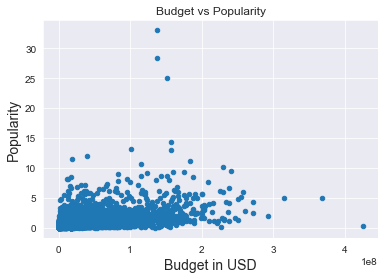

In [302]:
df.plot(kind='scatter', x='budget_adj', y='popularity')
plt.xlabel('Budget in USD', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.title('Budget vs Popularity');

There is no evidence for a relationship between popularity and budget. 

### Revenue

#### Do more popular films get more revenue?

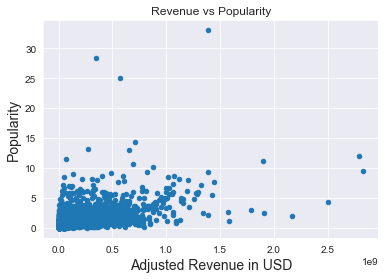

In [303]:
df.plot(kind='scatter', x='revenue_adj', y='popularity')
plt.xlabel('Adjusted Revenue in USD', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.title('Revenue vs Popularity');

There are a few outliers, but generally it doesn't seem that more popular films make more revenues. 

Text(0.5, 1.0, 'Mean Adjusted Revenue by year')

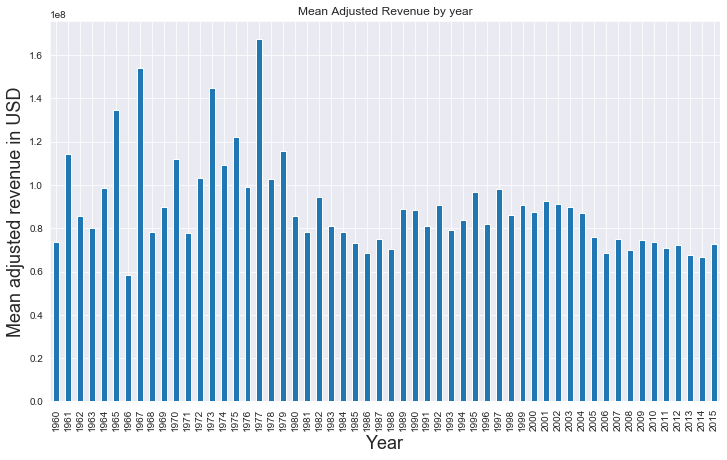

In [304]:
revenue_by_year=df.groupby('release_year').mean()['revenue_adj']

revenue_by_year.plot(kind='bar', figsize=(12,7))

plt.xlabel('Year', fontsize=18)
plt.ylabel('Mean adjusted revenue in USD', fontsize=18)
plt.title('Mean Adjusted Revenue by year')

Actually the average revenues stay pretty much the same since the 80s (there are no big fluctuations, as opposed to the years before). 

### Top films by Revenue

In [342]:
best_rev = heapq.nlargest(10, df.revenue_adj )  
top_rev=df.loc[df['revenue_adj']>= best_rev[9],['original_title','popularity','budget_adj','revenue_adj','release_year','production_companies']].sort_values('revenue_adj')
top_rev['ROI']= top_rev.revenue_adj -top_rev.budget_adj

top_rev

,original_title,popularity,budget_adj,revenue_adj,release_year,production_companies,ROI
4360,The Avengers,7.637767,2.089437e+08,1.443191e+09,2012,Marvel Studios,1.234248e+09
10109,One Hundred and One Dalmatians,2.631987,2.917944e+07,1.574815e+09,1961,Walt Disney Productions,1.545635e+09
8093,The Net,1.136610,3.148127e+07,1.583050e+09,1995,Columbia Pictures,1.551568e+09
8888,E.T. the Extra-Terrestrial,2.900556,2.372625e+07,1.791694e+09,1982,Universal Pictures|Amblin Entertainment,1.767968e+09
3,Star Wars: The Force Awakens,11.173104,1.839999e+08,1.902723e+09,2015,Lucasfilm|Truenorth Productions|Bad Robot,1.718723e+09
9805,Jaws,2.563191,2.836275e+07,1.907006e+09,1975,Universal Pictures|Zanuck/Brown Productions,1.878643e+09
10593,The Exorcist,2.010733,3.928928e+07,2.167325e+09,1973,Warner Bros.|Hoya Productions,2.128036e+09
5230,Titanic,4.355219,2.716921e+08,2.506406e+09,1997,Paramount Pictures|Twentieth Century Fox Film ...,2.234714e+09
1329,Star Wars,12.037933,3.957559e+07,2.789712e+09,1977,Lucasfilm|Twentieth Century Fox Film Corporation,2.750137e+09
1386,Avatar,9.432768,2.408869e+08,2.827124e+09,2009,Ingenious Film Partners|Twentieth Century Fox ...,2.586237e+09


From the Top 10 most popular films only Star Wars is also amongst the Top 10 by revenue. This film has also made the largest profit.

#### Question: ROI - do Films with bigger budget bring more revenue?

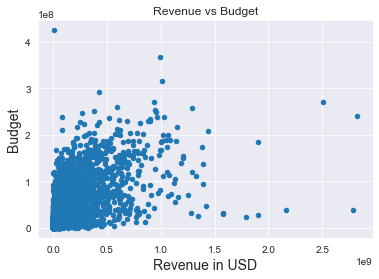

In [305]:
df.plot(kind='scatter', x='revenue_adj', y='budget_adj')
plt.xlabel('Revenue in USD', fontsize=14)
plt.ylabel('Budget', fontsize=14)
plt.title('Revenue vs Budget');

No clear relationship betweeen budget and revenue is observed.

### Rating

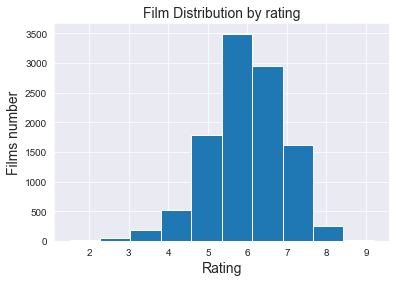

In [17]:
df.vote_average.hist();
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Films number', fontsize=14)
plt.title('Film Distribution by rating', fontsize=14);


The Histogramm is skewed to the right, implying the most films get a better than the average score and only a few receive bad scores. 

#### Question: If a film has a good rating, does it mean its voting is high?

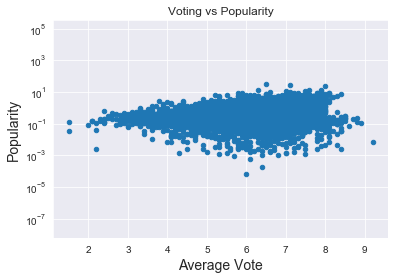

In [307]:
df.plot(kind='scatter', x='vote_average', y='popularity', logy=True)
plt.xlabel('Average Vote', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.title('Voting vs Popularity');
 

The scatter plot shows no relationship between Popularity and Average Vote. 

# Genres Analysis

#### Remove NA

In [162]:
sum(df.genres.isnull())

23

In [19]:
# drop NA   
films_w_genres=df[['genres','release_year']].copy(deep=True)
films_w_genres.dropna(inplace=True)
films_w_genres.reset_index(drop=True, inplace=True)

In [20]:
#Create genres DataFrame
genrelist=[]
years=[]
for i in range(len(films_w_genres)):
    genrelist.extend(films_w_genres.genres[i].split('|'))
    genres_number = films_w_genres.genres[i].count('|')+1
    for k in range(genres_number):
        years.append(films_w_genres.release_year[i])
d={'year':years, 'genres':genrelist}
genres=pd.DataFrame(d)

In [21]:
genres.genres.value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

### Word Cloud with Genres

Wordcloud - film genres


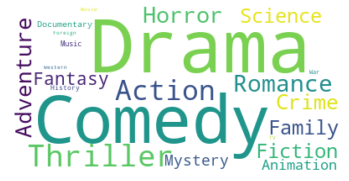

<Figure size 432x288 with 0 Axes>

In [23]:
# Generate a word cloud image
print('Wordcloud - film genres')
text = " ".join(genre for genre in genres.genres)
#text = " ".join(genre for genre in genrelist)
wordcloud = WordCloud(background_color ='white',collocations=False).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

Drama, Comedy and Thriller are the most common genres.   

#### Question: How do genres develop with time?

In [271]:
genres['count'] = 1

In [272]:
# Create bins 
bin_edges = [1959, 1970, 1980, 1990, 2000, 2010, 2020]  
bin_names = ['60s', '70s', '80s', '90s','2000s', '2010s' ]

# Creates period column
genres['period'] = pd.cut(genres['year'], bin_edges, labels=bin_names)

In [273]:
# Checks for successful creation of this column
genres.groupby(['period']).count()['count']

period
60s      1027
70s      1397
80s      2937
90s      4971
2000s    9831
2010s    6792
Name: count, dtype: int64

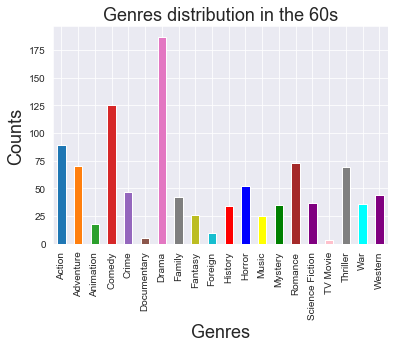

In [319]:
colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan','red','blue','yellow','green','brown','purple','pink','gray','cyan','purple']
#Counts by genres and period
g60=genres[genres.period=='60s'].groupby(['genres']).count()['count']
g60.plot(kind='bar', color=colors)
plt.title('Genres distribution in the 60s',fontsize=18)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.show()

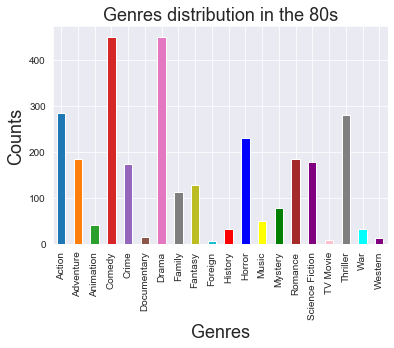

In [323]:
#Counts by genres and period
g80=genres[genres.period=='80s'].groupby(['genres']).count()['count']
g80.plot(kind='bar', color=colors )
plt.title('Genres distribution in the 80s',fontsize=18)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.show()

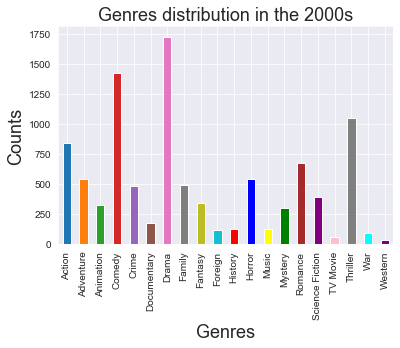

In [331]:
#Counts by genres and period
g2000=genres[genres.period=='2000s'].groupby(['genres']).count()['count']
g2000.plot(kind='bar', color=colors )
plt.title('Genres distribution in the 2000s',fontsize=18)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.show()

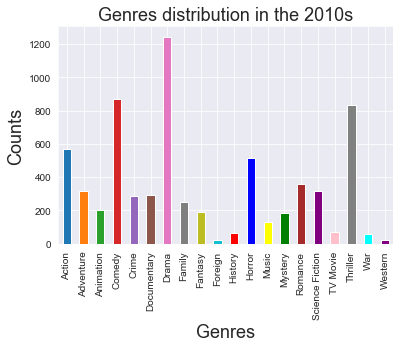

In [332]:
#Counts by genres and period
g2010=genres[genres.period=='2010s'].groupby(['genres']).count()['count']
g2010.plot(kind='bar', color=colors )
plt.title('Genres distribution in the 2010s',fontsize=18)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.show()

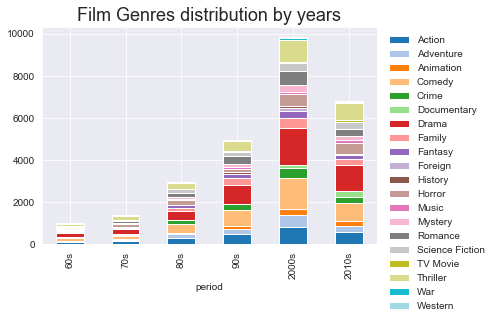

In [333]:
genres.groupby(['period','genres']).size().unstack().plot(kind='bar', stacked=True, cmap=cm.tab20, legend='reverse')
plt.legend(frameon=False,bbox_to_anchor=(1.01, 1), loc='best')
plt.title('Film Genres distribution by years',fontsize=18)
plt.show()

__Results:__
It is very interesting to see how the genres have been changing over time.
Drama and Comedy seem to be a favourite genre from the start. The 80s are characterised by a rise in the number of thrillers, horror films and Sci Fi at the expense of war and western films. Documentaries have become much more popular in the 2010s. 

In [24]:
# Remove NAs from Keywords column
df.keywords.dropna(inplace=True)
# Split the keywords
keywords=[]
for keys in df.keywords:
    keywords.extend(str(keys).split('|'))

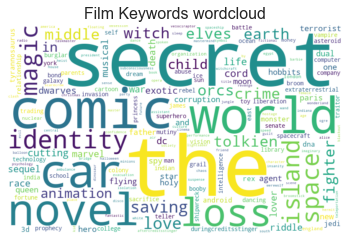

<Figure size 432x288 with 0 Axes>

In [27]:
# Generate a word cloud image
stopwords=['film','director','on','of','based']
tags = " ".join(tag for tag in keywords)

wordcloud = WordCloud(background_color ='white',collocations=False, width=800,height=500, stopwords=stopwords).generate(tags)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Film Keywords wordcloud',fontsize=16)
plt.figure()
plt.show()
wordcloud.to_file("keywords.png")

It is exciting to have a look at the keywords and find out what are the most common film subjects. Not surprisingly there are women,relationships, sex, female and love on the one side and murder, war, death and loss on the other. Would there be a difference if only the most profitable films are observed? Let's make another word cloud for the TOP 100 films by revenue.

In [26]:
#Top 100 by revenue
best_rev = heapq.nlargest(100, df.revenue_adj )
top_rev=df.loc[df['revenue_adj']>= best_rev[99]]
keywords=[]
for keys in top_rev.keywords:
    keywords.extend(str(keys).split('|'))

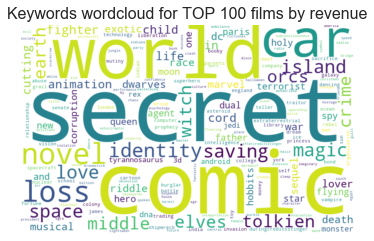

<Figure size 432x288 with 0 Axes>

In [28]:
# Generate a word cloud image
stopwords=['film','director','on','of','based','the']
tags = " ".join(tag for tag in keywords)
wordcloud = WordCloud(background_color ='white',collocations=False, width=800,height=500, stopwords=stopwords).generate(tags)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Keywords wordcloud for TOP 100 films by revenue',fontsize=16)
plt.figure()
plt.show()
wordcloud.to_file("keywords.png")

If only  the TOP 100 films by revenue are taken into consideration, than the recipe for success  seem to include: secrets, funny stuff, cars and a bit of magic :)  

<a id='conclusions'></a>
## Conclusions

Under the limitation of the available dataset (this is a community built database) and having to fill some values with means, the following conclusions could be made:
* The film industry is developing fast and the number of films produced is constantly growing over the years.
* A large budget is not a guarantee for the success of a film.
* A popular film does not necessarily bring high revenues.
* The genres have been changing over the years, alongside with the taste of the public.
* The word clouds give a nice glimpse in the favourite film subjects and themes.